# NFL - Which quarters correlate most with winning?
### Does winning in the first quarter really matter in the NFL?

![theatlantic](https://cdn.theatlantic.com/assets/media/video/img/upload/2012/01/screen-shot-2012-01-31-at-14643-pm/video-featured.png?1431550038)

##### Set the tone. Get ahead early. Win each quarter.
One would assume that [Al Pacino in Any Given Sunday](https://www.youtube.com/watch?v=f1yWSePMqsk) methedology in football is correct that the game of football is one inch by inch. But does certain inches matter? In this case we are refering to quarters in the NFL game. If a team wins each quarter obviosuly they win the game right? Makes sense, however, does winning in the first quarter coorelate to a win by the end of the game? By playing the hardest right out of the gates, would that lead to your team overdoing it early in the game so that there is limited energy in the final _inches_? 


Can teams really affort to wait that long to give it their all? Or does winning early actually set the tone for winning the entire game? Lunckly there is data readily available to feed our eager minds! In formal data science terms we would formalize these question simply as is there a correlation between the first quarter point differential and winning percentage?

In [1]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical cmputation library

# Display up to 120 columns of a dataframe
pd.set_option('display.max_columns', 120)

import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
# sns.set(font_scale = 2)

import season play by play data

In [2]:
pbp = pd.read_csv('nfl_season_pbp.csv')
pbp[pbp.posteam=='DAL'].tail()

/home/redne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (26,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,play_id,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
407683,2012-12-30,2012123007,3637,22,4,NaN,01:09,2,69.0,0.0,WAS,35.0,35.0,0,0,0.0,NaN,DAL,WAS,K.Forbath kicks 59 yards from WAS 35 to DAL 6....,1,20,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,D.Harris,NaN,C.Wilson,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.702720,0.048047,0.003351,0.034880,0.111059,0.000459,0.099483,0.0,0.0,0.635472,0.192438,NaN,NaN,0.984384,0.015616,0.985743,0.014257,0.015616,-0.001359,NaN,NaN,2012
407684,2012-12-30,2012123007,3659,22,4,1.0,01:02,2,62.0,7.0,DAL,26.0,74.0,10,4,0.0,0.0,DAL,WAS,(1:02) (Shotgun) T.Romo pass short middle to F...,1,4,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,1,3,0,middle,0,NaN,NaN,None,0,NaN,NaN,F.Jones,00-0026162,1,NaN,NaN,NaN,J.Wilson,S.Bowen,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.676691,0.044547,0.002162,0.032302,0.128912,0.000490,0.114896,0.0,0.0,0.827910,-0.054144,-0.172892,0.118748,0.985743,0.014257,0.988452,0.011548,0.014257,-0.002710,-0.002032,-0.000678,2012
407685,2012-12-30,2012123007,3687,22,4,2.0,00:40,1,40.0,22.0,DAL,30.0,70.0,6,9,0.0,0.0,DAL,WAS,"(:40) (No Huddle, Shotgun) T.Romo pass short r...",1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,2,3,0,right,0,NaN,NaN,None,0,NaN,NaN,J.Hanna,00-0029634,1,NaN,NaN,NaN,J.Wilson,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.689524,0.044315,0.001826,0.031873,0.122792,0.000518,0.109152,0.0,0.0,0.773766,0.176164,-0.124669,0.300833,0.988452,0.011548,0.932941,0.067059,0.011548,0.055511,0.002206,0.053305,2012
407686,2012-12-30,2012123007,3711,22,4,3.0,00:15,1,15.0,25.0,DAL,35.0,65.0,1,16,0.0,0.0,DAL,WAS,"(:15) (No Huddle, Shotgun) T.Romo pass short m...",1,7,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,5,2,0,middle,0,NaN,NaN,None,0,NaN,NaN,J.Hanna,00-0029634,1,NaN,NaN,NaN,P.Riley,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.686712,0.040447,0.001428,0.028126,0.107493,0.000404,0.135389,0.0,0.0,0.949931,0.000000,0.270577,-0.270577,0.932941,0.067059,1.000000,0.000000,0.067059,-0.067059,-0.065616,-0.001442,2012
407687,2012-12-30,2012123007,3735,22,4,NaN,00:00,0,0.0,15.0,DAL,35.0,35.0,0,16,0.0,0.0,DAL,WAS,END GAME,1,0,0,0,NaN,NaN,NaN,0,0,NaN,End of Game,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,-10.0,NaN,WAS,DAL,0,None,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000004,0.000000,NaN,NaN,2012


### Coorelate for all games by quarter

In [3]:
pbp_qt = pbp.groupby(by=['qtr']).AbsScoreDiff.mean()
pbp_qt

qtr
1     2.965845
2     7.198825
3     9.757652
4    10.954968
5     0.835036
Name: AbsScoreDiff, dtype: float64

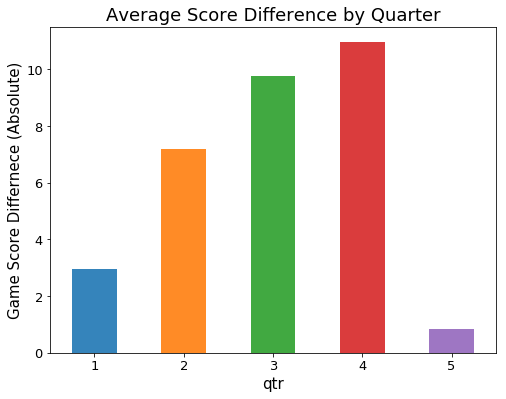

In [4]:
# graph it
fig, ax = plt.subplots(figsize=(8,6), dpi = 72)

ax.set_title("Average Score Difference by Quarter", fontsize = 18)
ax.set_xlabel('Quarters', fontsize = 15)
ax.set_ylabel('Game Score Differnece (Absolute)', fontsize=15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

pbp_qt.plot(kind='bar', alpha = 0.9, rot=0)
plt.show()

#### Add win game win indicators

here we will simply take a subset of the data by season, gameID (unique games), home and away team and create a new dataframe (df) to indicate which team won their game overall. There are other features embedded in the pbp dataset to indicate by play and quarter (more or less) the momentum or winning percentate based on a number of features that we will look into further, but for right now, we simply need a boolean indicator whether a team won or loss overall, so when we assess per quarter we can see the distribution of W/L per quarter score difference. 

In [5]:
def lastplay(df):
    if np.isnan(df.iloc[-1].Home_WP_pre) == False:
        return df.iloc[-1] # last row of data frame
    elif np.isnan(df.iloc[-2].Home_WP_pre) == False:
        return df.iloc[-2] # last row of data frame

# pbp[(pbp.Season == 2017)].groupby('GameID').apply(lastplay)

In [6]:
wl_df = pbp.groupby('GameID').apply(lastplay).groupby(by=['Season','GameID','HomeTeam','AwayTeam']).agg({'Home_WP_pre':lambda x: int(round(x)),
                                                                    'Away_WP_pre':lambda x: int(round(x))}).reset_index()


wl_df = wl_df[['GameID','HomeTeam','AwayTeam','Home_WP_pre', 'Away_WP_pre']].rename(columns={'Home_WP_pre':'home_win',
                                                                       'Away_WP_pre':'away_win'})


wl_df.head()

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'GameID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,GameID,HomeTeam,AwayTeam,home_win,away_win
0,2.009091e+09,PIT,TEN,1.0,0.0
1,2.009091e+09,ATL,MIA,1.0,0.0
2,2.009091e+09,BAL,KC,1.0,0.0
3,2.009091e+09,CAR,PHI,0.0,1.0
4,2.009091e+09,CIN,DEN,0.0,1.0


In [7]:
pbp = pbp.merge(wl_df, on=['GameID','HomeTeam','AwayTeam'], how='left')

use lambda logic to set a Win or Loss for each team on offesne (posteam)

In [8]:
pbp['team_win'] = pbp.apply(lambda x: x.home_win if x.HomeTeam == x.posteam else x.away_win, axis=1)


create a column for a total turnovers

In [9]:
tunrover_list = ['InterceptionThrown', 'Fumble']
pbp['Turnover'] = pbp[tunrover_list].sum(axis=1)
pbp[pbp.GameID==2017123108].groupby('posteam')['Turnover'].sum()

posteam
DAL    1
PHI    3
Name: Turnover, dtype: int64

In [10]:
pbp_df = pbp.groupby(by=['Season','GameID','qtr',
           'HomeTeam',
           'AwayTeam','posteam']).agg({'team_win':'mean',
                                       'ScoreDiff':'mean',
    'AbsScoreDiff':'mean',
     'Win_Prob':'mean',
     'Yards.Gained':'sum',
                                       'Penalty.Yards':'sum',
     'Touchdown':'sum',
                                       'Turnover':'sum',
                                       'FirstDown':'count',
                                       'FirstDown':'sum'
                                       
    }).reset_index()

In [11]:
pbp_df[pbp_df.GameID==2017123108 ].tail(10)

,Season,GameID,qtr,HomeTeam,AwayTeam,posteam,team_win,ScoreDiff,AbsScoreDiff,Win_Prob,Yards.Gained,Penalty.Yards,Touchdown,Turnover,FirstDown
18623,2017,2017123108,1,PHI,DAL,DAL,1.0,0.00,0.00,0.536279,31,0,0,0,4.0
18624,2017,2017123108,1,PHI,DAL,PHI,0.0,0.00,0.00,0.508311,89,19,0,2,7.0
18625,2017,2017123108,2,PHI,DAL,DAL,1.0,0.00,0.00,0.507605,152,30,0,1,9.0
18626,2017,2017123108,2,PHI,DAL,PHI,0.0,0.00,0.00,0.509095,69,10,0,0,4.0
18627,2017,2017123108,3,PHI,DAL,DAL,1.0,0.00,0.00,0.492023,100,9,0,0,5.0
18628,2017,2017123108,3,PHI,DAL,PHI,0.0,0.00,0.00,0.496479,29,25,0,0,5.0
18629,2017,2017123108,4,PHI,DAL,DAL,1.0,4.08,4.08,0.785912,118,5,1,0,8.0
18630,2017,2017123108,4,PHI,DAL,PHI,0.0,-6.00,6.00,0.233718,93,15,0,1,7.0


Add Features for Thrid and Fouth down

In [12]:
test = pbp[(pbp.down == 4.0) & (pbp.PlayType != 'Punt') & (pbp.PlayType != 'No Play')& (pbp.PlayType != 'Field Goal')].groupby(['GameID','qtr','posteam']).agg({'down':'count',
                                                                          'FirstDown':'sum'}).reset_index()

test['fourth_down_conv_rate']= test['FirstDown']/test['down']*100

test = test.drop(['down','FirstDown'], axis=1)
pbp_df = pbp_df.merge(test, on=['GameID','qtr','posteam'], how='left')

In [13]:
test = pbp[(pbp.down == 3.0) & (pbp.PlayType != 'Punt') & (pbp.PlayType != 'No Play')& (pbp.PlayType != 'Field Goal')].groupby(['GameID','qtr','posteam']).agg({'down':'count',
                                                                          'FirstDown':'sum'}).reset_index()

test['third_down_conv_rate']= test['FirstDown']/test['down']*100

test = test.drop(['down','FirstDown'], axis=1)
pbp_df = pbp_df.merge(test, on=['GameID','qtr','posteam'], how='left')

Use lambda logic to have a win loss str variable for each team

In [14]:
pbp_df['team_win_str'] = pbp_df.apply(lambda x: 'Win' if x.team_win == 1.0 else 'Loss', axis=1)


To understand the correlation between score in quarters, we need to take the score differences by quarter and make each of these features. To do this we will utilize pandas.pivot_table function to enable us to transpose our score difference values.

In [15]:
#df2 = pd.pivot_table(pbp_df, index = ['GameID','posteam'], columns = ['qtr'], values = 'AbsScoreDiff').reset_index()
df2 = pd.pivot_table(pbp_df, index = ['GameID','posteam'], columns = ['qtr'], values = 'ScoreDiff').reset_index()
df2 = df2.rename(columns= {1:'ScoreDiff1', 2:'ScoreDiff2', 3:'ScoreDiff3', 4:'ScoreDiff4', 5:'ScoreDiff5'})
df2[df2.posteam == 'DAL'].head()

qtr,GameID,posteam,ScoreDiff1,ScoreDiff2,ScoreDiff3,ScoreDiff4,ScoreDiff5
18,2009091308,DAL,1.235294,-0.727273,11.533333,11.933333,NaN
60,2009092014,DAL,-0.850000,-2.615385,-0.312500,-3.500000,NaN
95,2009092800,DAL,0.000000,-1.750000,-2.272727,6.450000,NaN
116,2009100410,DAL,1.178571,5.333333,3.000000,-1.466667,NaN
132,2009101104,DAL,0.000000,-9.045455,-8.437500,-1.200000,0.0


In [16]:
pbp_df = pbp_df.merge(df2, on=['GameID','posteam'], how='left')
pbp_df.head()

,Season,GameID,qtr,HomeTeam,AwayTeam,posteam,team_win,ScoreDiff,AbsScoreDiff,Win_Prob,Yards.Gained,Penalty.Yards,Touchdown,Turnover,FirstDown,fourth_down_conv_rate,third_down_conv_rate,team_win_str,ScoreDiff1,ScoreDiff2,ScoreDiff3,ScoreDiff4,ScoreDiff5
0,2009,2009091000,1,PIT,TEN,PIT,1.0,0.00000,0.00000,0.524745,40,0,0,1,5.0,NaN,25.000000,Win,0.0,0.24000,0.0,-2.25,0.0
1,2009,2009091000,1,PIT,TEN,TEN,0.0,0.00000,0.00000,0.532470,128,20,0,1,8.0,NaN,33.333333,Loss,0.0,-1.26087,0.0,0.00,NaN
2,2009,2009091000,2,PIT,TEN,PIT,1.0,0.24000,0.24000,0.525211,172,25,1,1,4.0,NaN,33.333333,Win,0.0,0.24000,0.0,-2.25,0.0
3,2009,2009091000,2,PIT,TEN,TEN,0.0,-1.26087,1.26087,0.514109,134,15,1,0,6.0,NaN,50.000000,Loss,0.0,-1.26087,0.0,0.00,NaN
4,2009,2009091000,3,PIT,TEN,PIT,1.0,0.00000,0.00000,0.539772,28,0,0,1,3.0,NaN,25.000000,Win,0.0,0.24000,0.0,-2.25,0.0


### Create a list of potential features that correlate with score difference by quarter

In featre analysis we typically analysis from the data and subject matter judgement, as well as, trial and error to determine similar selection operators that potentially correlate with our objective. 

Below we will utilize Pearson's Correlation Coefficient with a couple of collumns to identify if certain attributes within the play by play data has a high correlation with determining which quarter 

,ScoreDiff,ScoreDiff1,ScoreDiff2,ScoreDiff3,ScoreDiff4,ScoreDiff5,Touchdown,Turnover,Penalty.Yards,Win_Prob,AbsScoreDiff,team_win,third_down_conv_rate,fourth_down_conv_rate
ScoreDiff,1.000000,0.559482,0.768802,0.821134,0.797460,0.138105,0.109917,-0.219269,-0.023194,0.946623,-0.128761,0.556516,0.026005,-0.112054
ScoreDiff1,0.559482,1.000000,0.724574,0.544819,0.475165,0.074401,0.083340,-0.108569,0.006327,0.556731,-0.118081,0.315446,0.026831,-0.058174
ScoreDiff2,0.768802,0.724574,1.000000,0.854026,0.738583,-0.008841,0.146700,-0.171057,-0.009087,0.755369,-0.110261,0.494932,0.053326,-0.086898
ScoreDiff3,0.821134,0.544819,0.854026,1.000000,0.904211,0.033174,0.186121,-0.197651,-0.005292,0.796865,-0.109031,0.617010,0.060017,-0.103638
ScoreDiff4,0.797460,0.475165,0.738583,0.904211,1.000000,0.218142,0.223010,-0.216873,-0.002562,0.771073,-0.099061,0.719508,0.072923,-0.125466
ScoreDiff5,0.138105,0.074401,-0.008841,0.033174,0.218142,1.000000,0.079495,0.065855,0.017230,0.099225,-0.021802,0.101465,0.020014,0.050579
Touchdown,0.109917,0.083340,0.146700,0.186121,0.223010,0.079495,1.000000,-0.017440,0.094766,0.129457,0.088861,0.174788,0.181549,-0.222856
Turnover,-0.219269,-0.108569,-0.171057,-0.197651,-0.216873,0.065855,-0.017440,1.000000,0.081907,-0.239800,0.087953,-0.194940,0.125786,0.063884
Penalty.Yards,-0.023194,0.006327,-0.009087,-0.005292,-0.002562,0.017230,0.094766,0.081907,1.000000,-0.024454,0.018030,-0.009016,-0.017172,-0.004453
Win_Prob,0.946623,0.556731,0.755369,0.796865,0.771073,0.099225,0.129457,-0.239800,-0.024454,1.000000,-0.152067,0.610974,0.048451,-0.128962


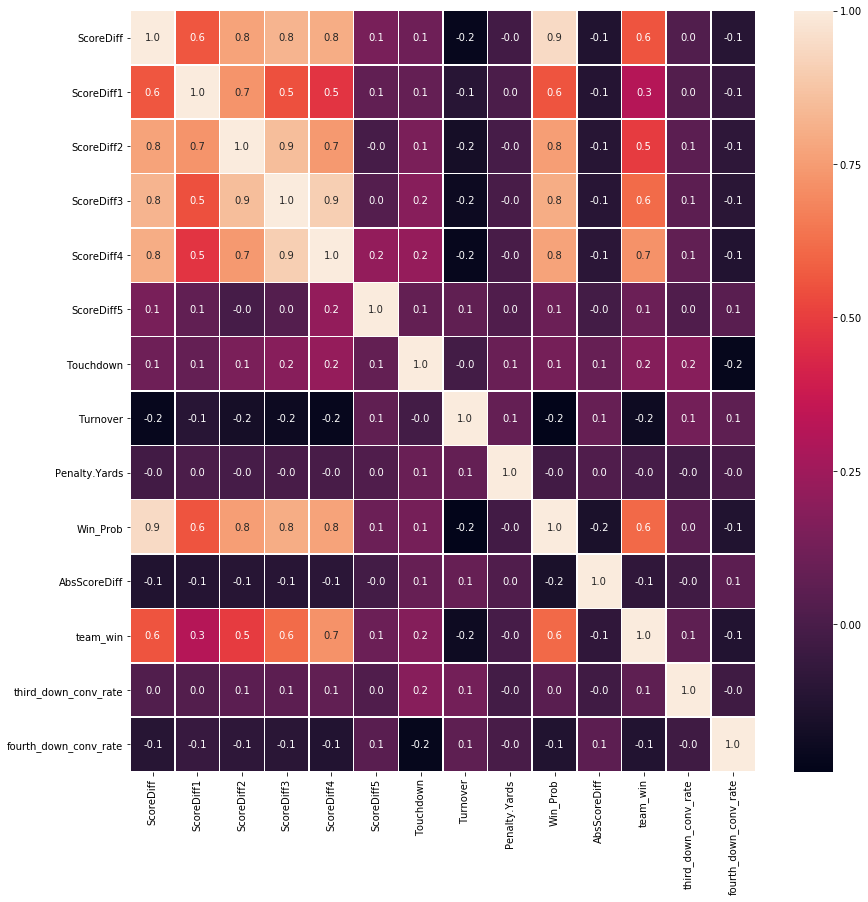

In [17]:
potentialFeatures = ['ScoreDiff','ScoreDiff1','ScoreDiff2','ScoreDiff3','ScoreDiff4','ScoreDiff5',
                     'Touchdown','Turnover','Penalty.Yards','Win_Prob','AbsScoreDiff','team_win','third_down_conv_rate','fourth_down_conv_rate']
nfl_corr = pbp_df[potentialFeatures].corr()
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(nfl_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
nfl_corr

#### Perason's R Correlation Coefficient

__Correlation coefficients__ ranges from -1 to 1. When the value is cloase to 1, it means that there is a strong positive correlation. For example, below we subset the correlation matrix that we created above and sorted the values. We can observe the team winning percentage tends to go up when there is a higher score difference in the fourth quarter. When the coefficient is close to -1, it means that there is a strong negative correlation: you can see a negative correlation between the team wins and turnovers

In [18]:
nfl_corr['team_win'].sort_values(ascending=False)

team_win                 1.000000
ScoreDiff4               0.719508
ScoreDiff3               0.617010
Win_Prob                 0.610974
ScoreDiff                0.556516
ScoreDiff2               0.494932
ScoreDiff1               0.315446
Touchdown                0.174788
ScoreDiff5               0.101465
third_down_conv_rate     0.062495
Penalty.Yards           -0.009016
AbsScoreDiff            -0.082671
fourth_down_conv_rate   -0.126623
Turnover                -0.194940
Name: team_win, dtype: float64

In [19]:
cols = ['ScoreDiff','ScoreDiff1','ScoreDiff2','ScoreDiff3','ScoreDiff4','ScoreDiff5',
                     'Touchdown','Turnover','Win_Prob','AbsScoreDiff']

In [20]:
# create a list containing Pearson's correlation between 'team_win' with each column in cols
correlations = [pbp_df['team_win'].corr(pbp_df[f]) for f in cols]
len(cols), len(correlations)

(10, 10)

We make sure that the number of selected features and the correlations calculated are the same (e.g., 10 in this case).

Next couple of cells show some lines of code that use pandas plotting functions to create a 2D graph of these correlation values and column names

In [21]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20,12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [22]:
# create a dataframe suing cols and correlations

df5 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

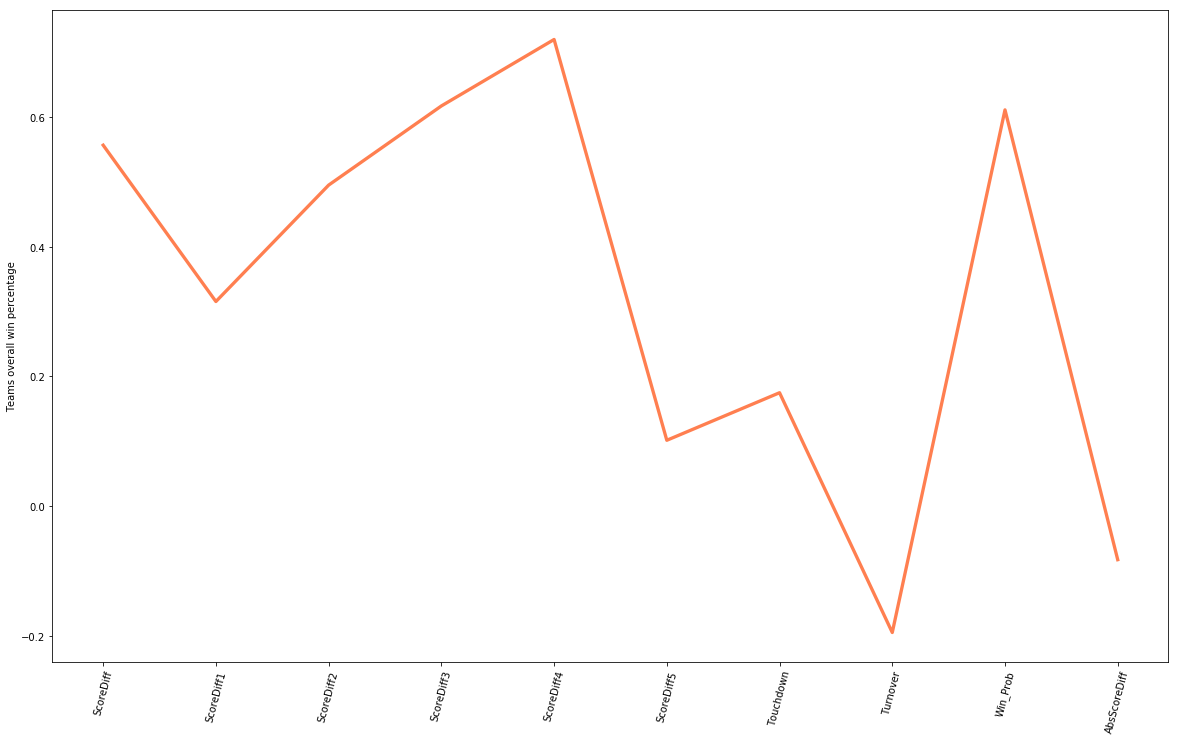

,attributes,correlation
0,ScoreDiff,0.556516
1,ScoreDiff1,0.315446
2,ScoreDiff2,0.494932
3,ScoreDiff3,0.617010
4,ScoreDiff4,0.719508
5,ScoreDiff5,0.101465
6,Touchdown,0.174788
7,Turnover,-0.194940
8,Win_Prob,0.610974
9,AbsScoreDiff,-0.082671


In [23]:
# lets plot above dataframe using the function we created

plot_dataframe(df5, 'Teams overall win percentage')
df5

In [24]:
# melt dataframe
melted_df = pd.melt(pbp_df.groupby(['qtr','posteam'])['ScoreDiff','team_win','Win_Prob'].mean().reset_index(),
                   id_vars=['qtr', 'posteam'],
                   var_name = 'Stat')
melted_df.head()

,qtr,posteam,Stat,value
0,1,ARI,ScoreDiff,-1.122718
1,1,ATL,ScoreDiff,-0.302202
2,1,BAL,ScoreDiff,-0.650398
3,1,BUF,ScoreDiff,-0.925868
4,1,CAR,ScoreDiff,-0.927366


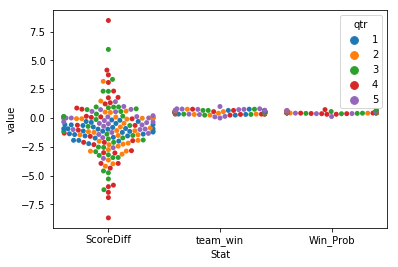

In [25]:

sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='qtr')

/home/redne/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


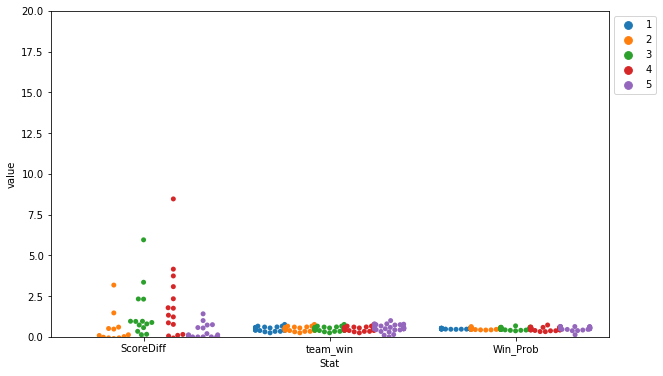

In [26]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='qtr', 
              split=True) # 2. Separate points by hue
 
# 4. Adjust the y-axis
plt.ylim(0, 20)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Next we will plot the winning and losising segments of our data. 

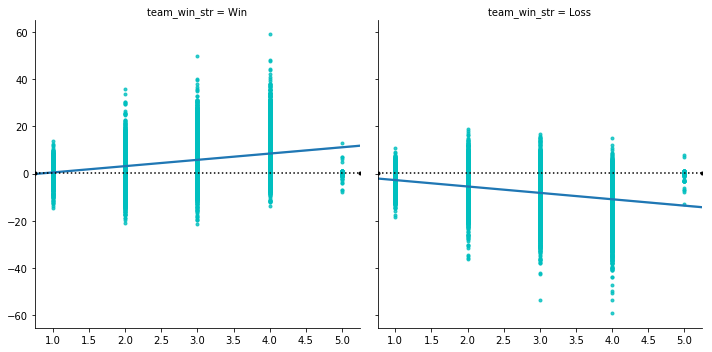

In [27]:
g = sns.lmplot('qtr', 'ScoreDiff', col='team_win_str', data=pbp_df,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Porbability of winning per quarter

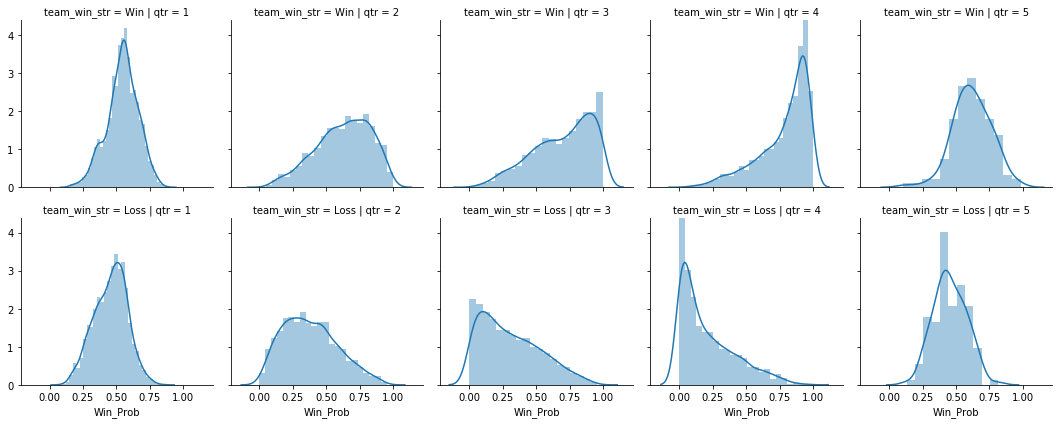

In [28]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(pbp_df, row='team_win_str', col='qtr')
g.map(sns.distplot, "Win_Prob")
plt.show()

Here we utilized a bar plot to show the distributino of the score per quarter using the mean using the win / loss category

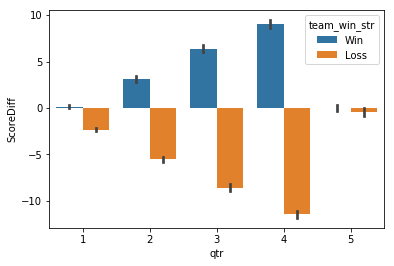

In [29]:
sns.barplot(x="qtr", y="ScoreDiff", hue="team_win_str", data=pbp_df);

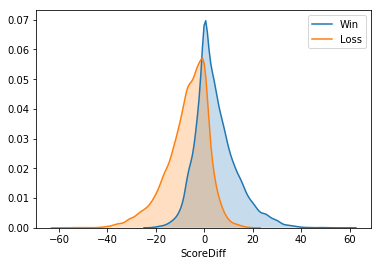

In [30]:

sns.kdeplot(pbp_df.ScoreDiff[pbp_df.team_win_str=='Win'], label='Win', shade=True)
sns.kdeplot(pbp_df.ScoreDiff[pbp_df.team_win_str=='Loss'], label='Loss', shade=True)
plt.xlabel('ScoreDiff');

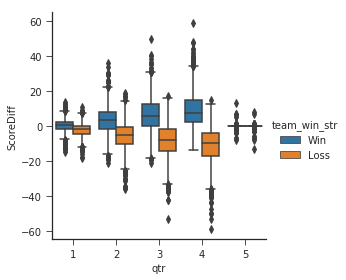

In [31]:
plt.figure(figsize=(50,10))
with sns.axes_style(style='ticks'):
    g = sns.factorplot("qtr", "ScoreDiff", "team_win_str", data=pbp_df, kind="box")
    g.set_axis_labels("qtr", "ScoreDiff");

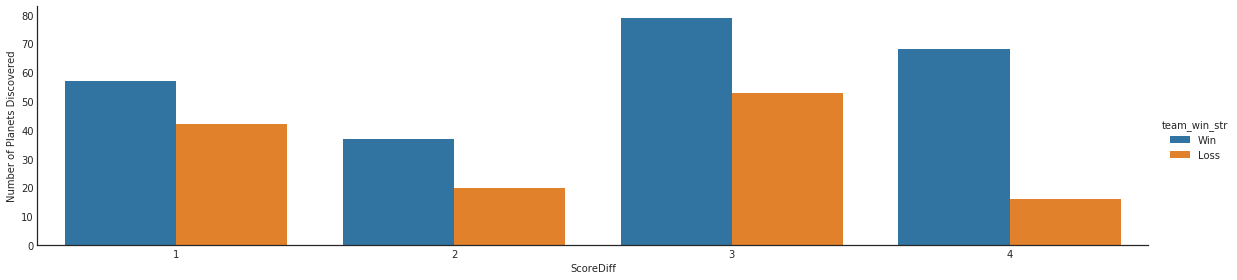

In [32]:
with sns.axes_style('white'):
    g = sns.factorplot("ScoreDiff", data=pbp_df, aspect=4.0, kind='count',
                       hue='team_win_str', order=range(1,5))
    g.set_ylabels('Number of Planets Discovered')

### Modeling
create feature df and drio unnecessary fatures. 

In [33]:
# y includes our labels (wins and losses) and x includes our features
y = pbp_df.team_win_str
x_1 = pbp_df[potentialFeatures].drop('team_win', axis=1)

# change NAN to 0
where_are_NaNs = np.isnan(x_1)
x_1[where_are_NaNs] = 0

use the package sklearn and its associated preprocessing utilities to normalize the data.

In [34]:
from sklearn import preprocessing

x = x_1[['ScoreDiff','ScoreDiff1','ScoreDiff2','ScoreDiff3','ScoreDiff4','ScoreDiff5']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_1 = pd.DataFrame(x_scaled)

Accuracy is:  0.9652220438737292


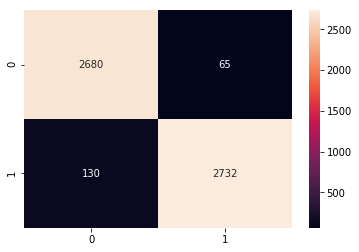

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is 91.2% and it can be seen in the concusion matrix that we have made some wrong predictions. Now lets see other feature selection methods to find better results

### Univariate feature selection and random forest classificatio

In univariate feature selection, we will use [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) that removes all but the k highest scoring features. In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.14536860e+01 3.41695616e+01 9.11332104e+01 1.28568823e+02
 1.95118406e+02 8.15115663e-03]
Feature list: RangeIndex(start=0, stop=6, step=1)


Accuracy is:  0.9759229534510433


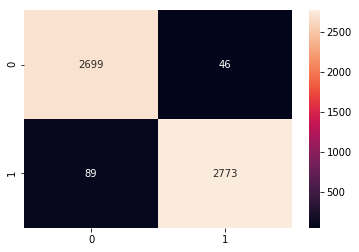

In [37]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")